In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
%cd /content/drive/MyDrive/'1 FSU'/'2. costar data'/'11_CRE second submission 202205'
%ls

/content/drive/MyDrive/1 FSU/2. costar data/11_CRE second submission 202205
'100_code_COVID_Commercial Property_202108.ipynb'   Office_01-18-2022.xlsx
'1_code_COVID_Commercial Property_202205.ipynb'     Retail_01-18-2022.xlsx
 Industrial_01-18-2022.xlsx


##1 import data, draw graph from 2018 to 2021

In [4]:

office=pd.read_excel('Office_01-18-2022.xlsx')
retail=pd.read_excel('Retail_01-18-2022.xlsx')
industry=pd.read_excel('Industrial_01-18-2022.xlsx')

In [5]:
office1=office[['Period','Market Sale Price Growth','Market Rent Growth','Vacancy Rate','Sales Volume Transactions']]

retail1=retail[['Period','Market Sale Price Growth','Market Rent Growth','Vacancy Rate','Sales Volume Transactions']]

industry1=industry[['Period','Geography Name','Market Sale Price Growth','Market Rent Growth','Vacancy Rate','Sales Volume Transactions']]

In [6]:
#fiter 2018 to 2021
office2=office1[(office1['Period'].str.contains("2018 Q"))|(office1['Period'].str.contains("2019 Q"))|(office1['Period'].str.contains("2020 Q"))|(office1['Period'].str.contains("2021 Q"))]
retail2=retail1[(retail1['Period'].str.contains("2018 Q"))|(retail1['Period'].str.contains("2019 Q"))|(retail1['Period'].str.contains("2020 Q"))|(retail1['Period'].str.contains("2021 Q"))]
industry2=industry1[(industry1['Period'].str.contains("2018 Q"))|(industry1['Period'].str.contains("2019 Q"))|(industry1['Period'].str.contains("2020 Q"))|(industry1['Period'].str.contains("2021 Q"))]


In [ ]:
#calculate the average value of each quarter and generate a new table.

cre=[office2,retail2,industry2]
dataname = ['Office', 'Retail', 'Industry']
period=office2['Period'].unique().tolist()
column=['Market Sale Price Growth','Market Rent Growth','Vacancy Rate','Sales Volume Transactions']

data_pd_complete = pd.DataFrame(columns=['Feature', 'Time']+dataname)
for col in column:
    data_dict  = {}
    
    for idx in range(len(cre)):
        data = cre[idx]
        data_title = dataname[idx]
        #period
        
        mean_list = []
        period_list = []
        type_name = []
        for i in range(len(period)):
            time=period[i]
            subset=data[data['Period']==time]
            #print(subset)
            col_mean = subset[col].mean()
            #print(col, '_',col_mean)
            
            # save to dictionary
            period_list.append(time)
            mean_list.append(col_mean)
            type_name.append(col)
        
        data_dict['Time'] = period_list
        data_dict[data_title] = mean_list
        data_dict['Feature'] = type_name
    
    data_pd = pd.DataFrame(data_dict, columns=['Feature', 'Time']+dataname)
    
    
    data_pd_complete = data_pd_complete.append(data_pd, ignore_index=True)

data_pd_complete





In [19]:
#data_pd_complete.to_csv('50_average_data_from2018_to_2021.csv',index=0)

In [18]:
#验证一下：验证有效
office3=office2[office2['Period']=='2018 Q2']['Market Sale Price Growth'].mean()
office3
retail3=retail2[retail2['Period']=='2018 Q2']['Market Sale Price Growth'].mean()
retail3

industry3=industry2[industry2['Period']=='2018 Q2']['Market Sale Price Growth'].mean()
industry3

0.07982273713729009

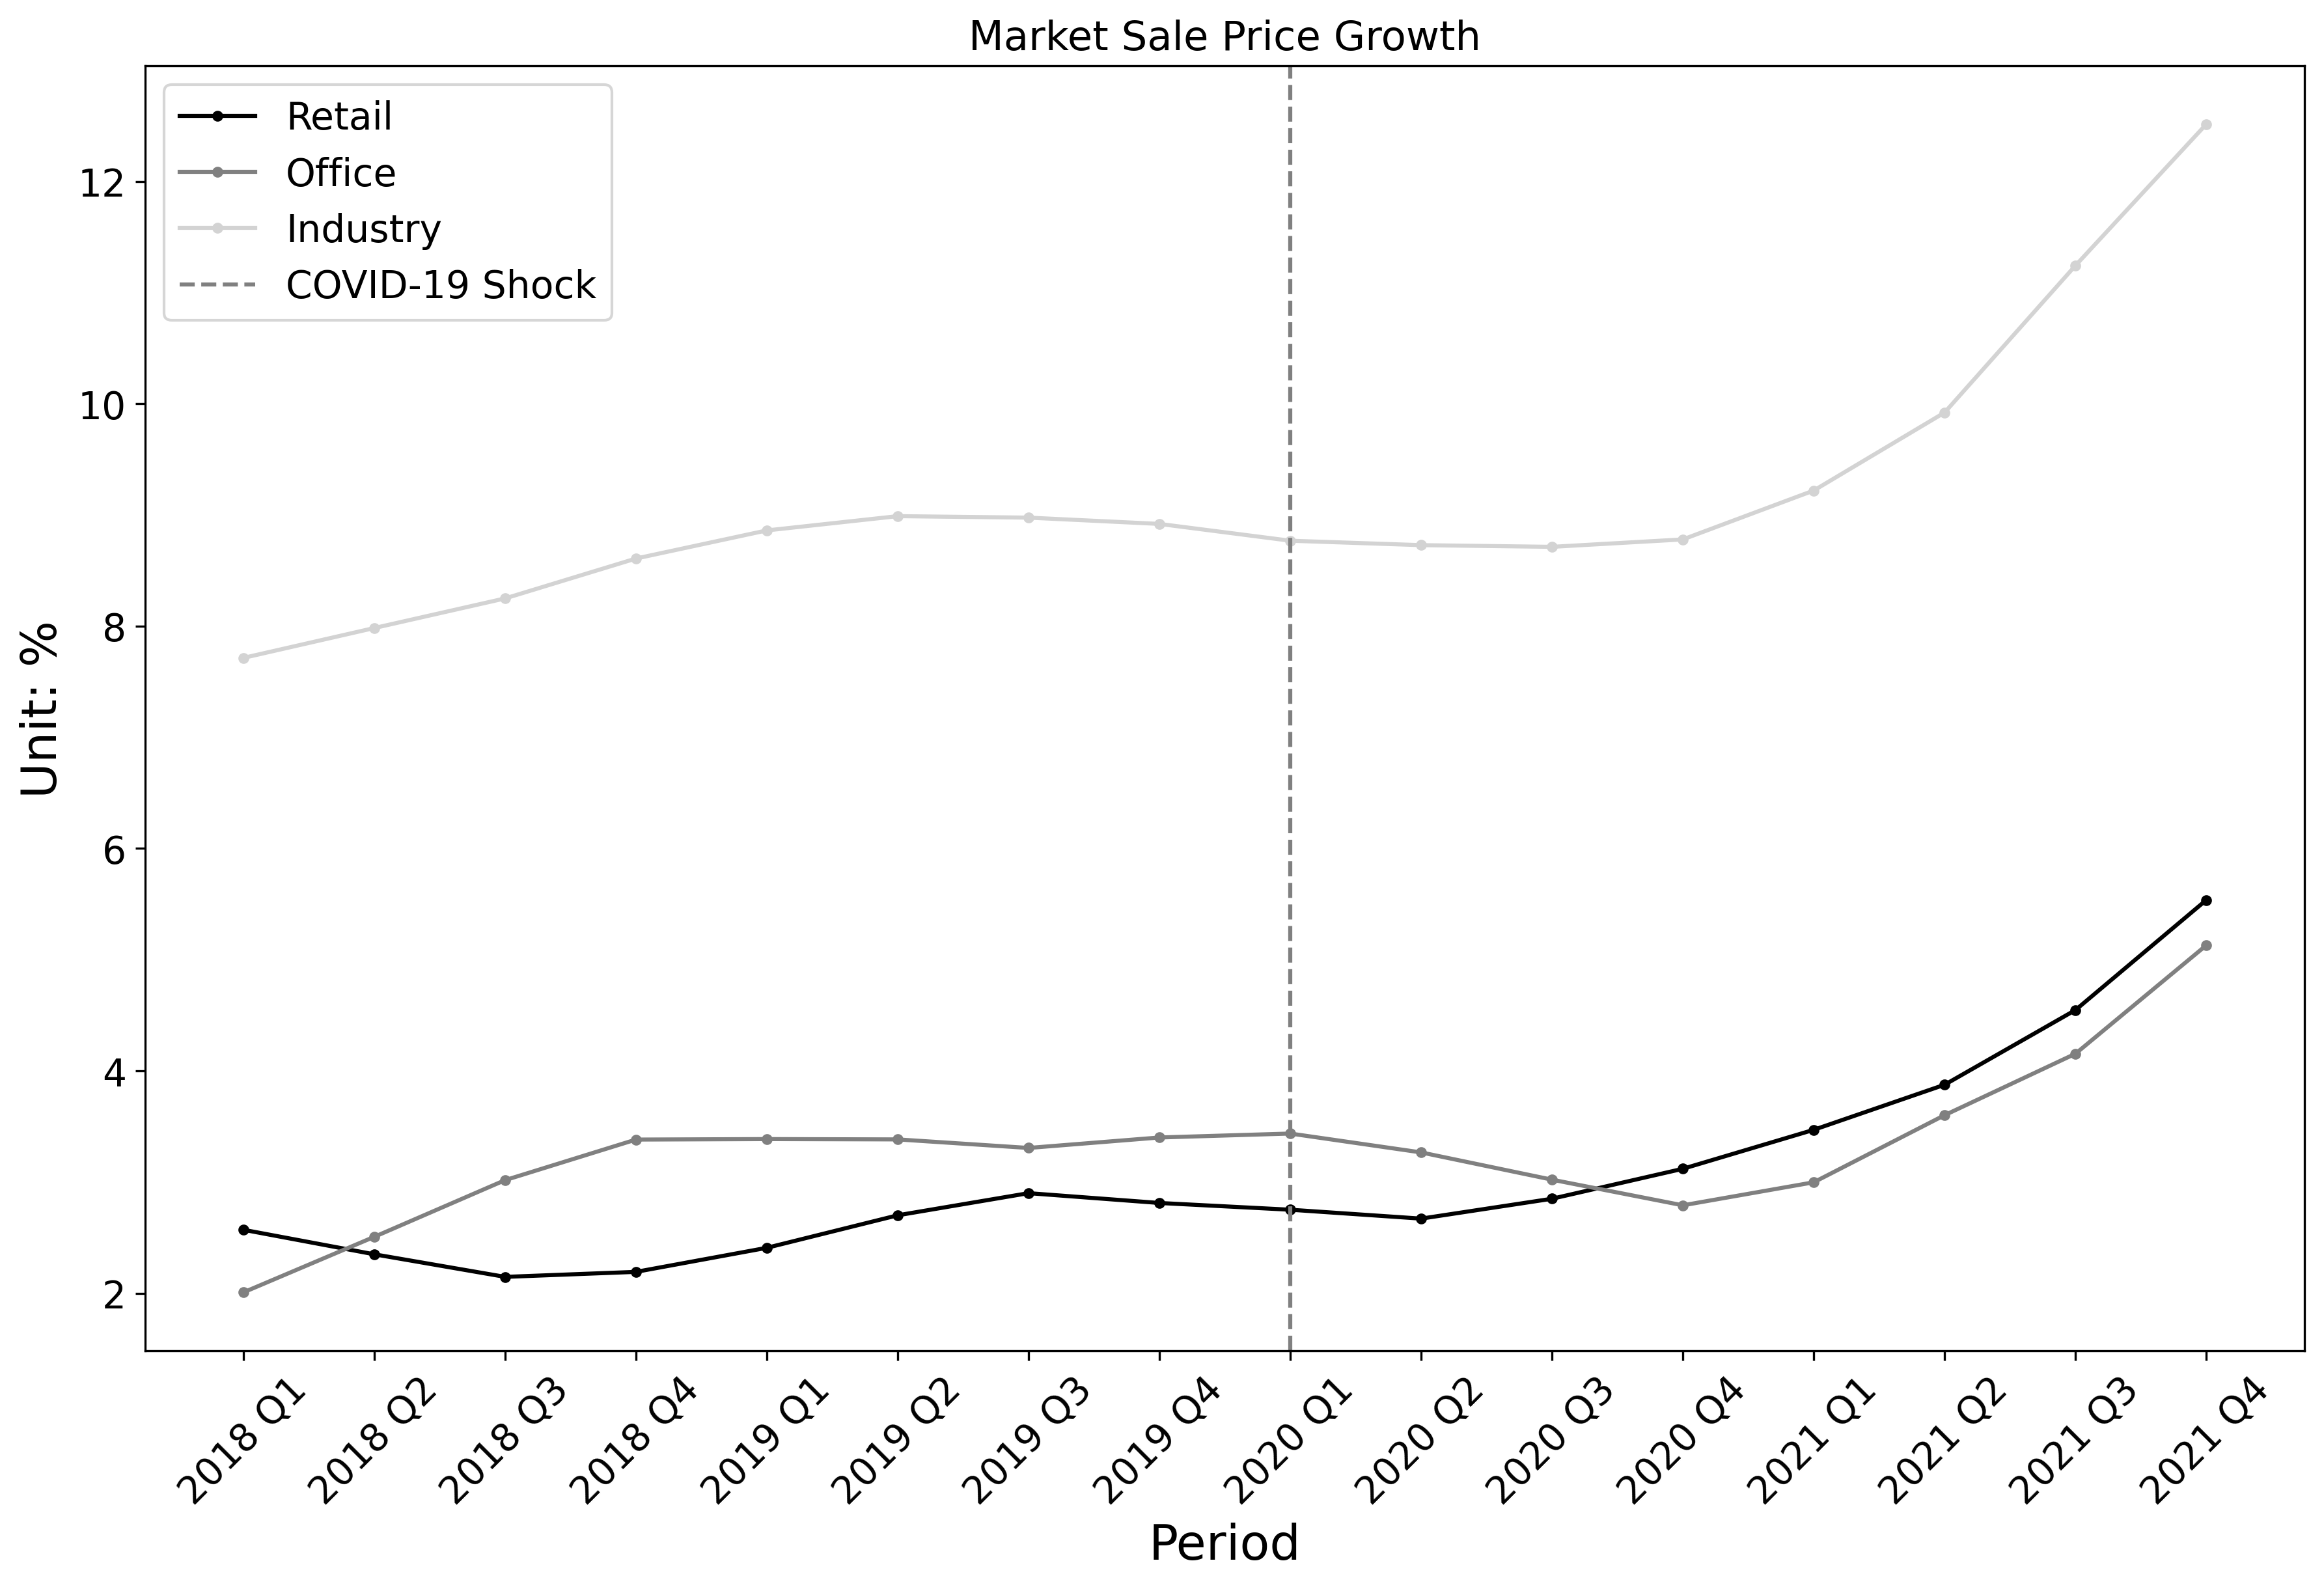

In [39]:
#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Sale Price Growth'
subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Market Sale Price Growth' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = subset_col.copy()
x = subset['Time'].to_list()
y1 = subset['Retail'].to_numpy()*100
y2 = subset['Office'].to_numpy()*100
y3 = subset['Industry'].to_numpy()*100
# plot lines
plt.plot(x, y1, label = "Retail", color='black',marker='.')
plt.plot(x, y2, label = "Office", color='gray',marker='.')
plt.plot(x, y3, label = "Industry", color='lightgray',marker='.')
plt.axvline(x='2020 Q1', color='gray', linestyle='--',  label = "COVID-19 Shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Unit: %', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.title('Market Sale Price Growth', fontsize=15)
#plt.show()
#plt.savefig('2Market Sale Price Growth_20220502.png',dpi=300)
plt.savefig('Market Sale Price Growth_20220502.png',bbox_inches='tight',dpi=300)

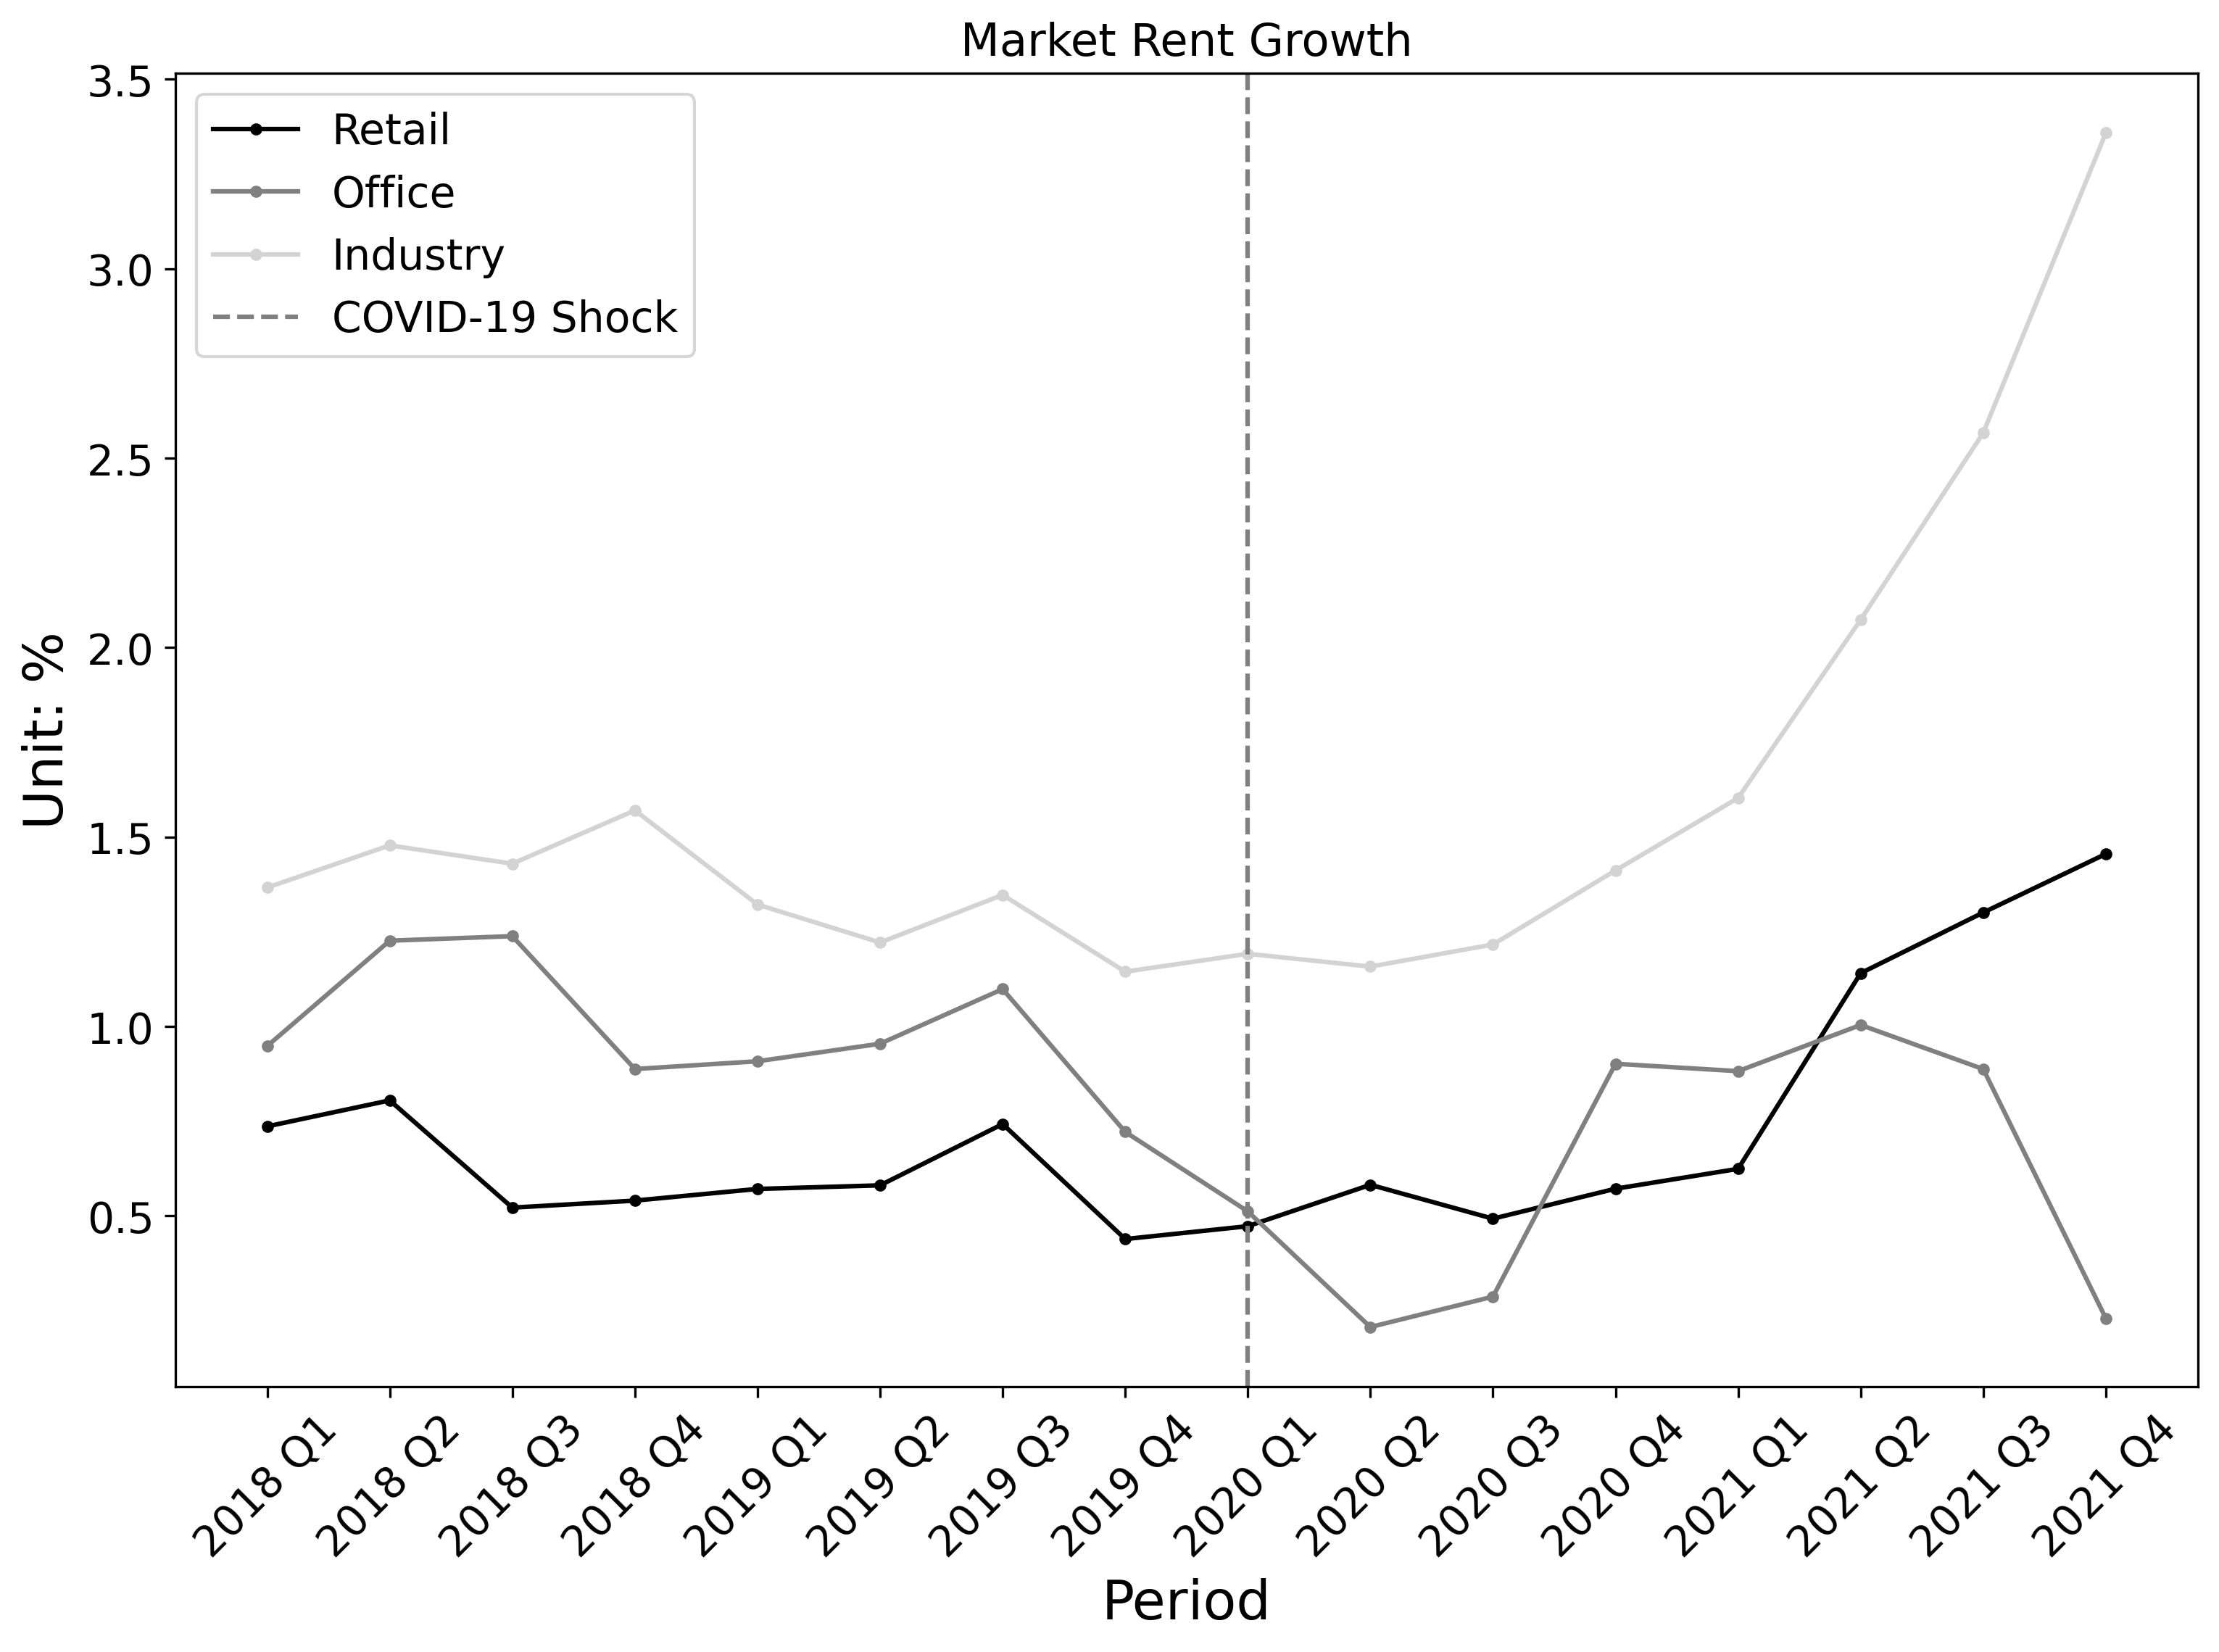

In [36]:
#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Rent Growth'
subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Market Rent Growth' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = subset_col.copy()
x = subset['Time'].to_list()
y1 = subset['Retail'].to_numpy()*100
y2 = subset['Office'].to_numpy()*100
y3 = subset['Industry'].to_numpy()*100
# plot lines
plt.plot(x, y1, label = "Retail", color='black',marker='.')
plt.plot(x, y2, label = "Office", color='gray',marker='.')
plt.plot(x, y3, label = "Industry", color='lightgray',marker='.')
plt.axvline(x='2020 Q1', color='gray', linestyle='--',  label = "COVID-19 Shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Unit: %', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Market Rent Growth', fontsize=15)
#plt.show()
#plt.savefig('Market Rent Growth_20220502.png')
plt.savefig('Market Rent Growth_20220502.png',bbox_inches='tight',dpi=300)

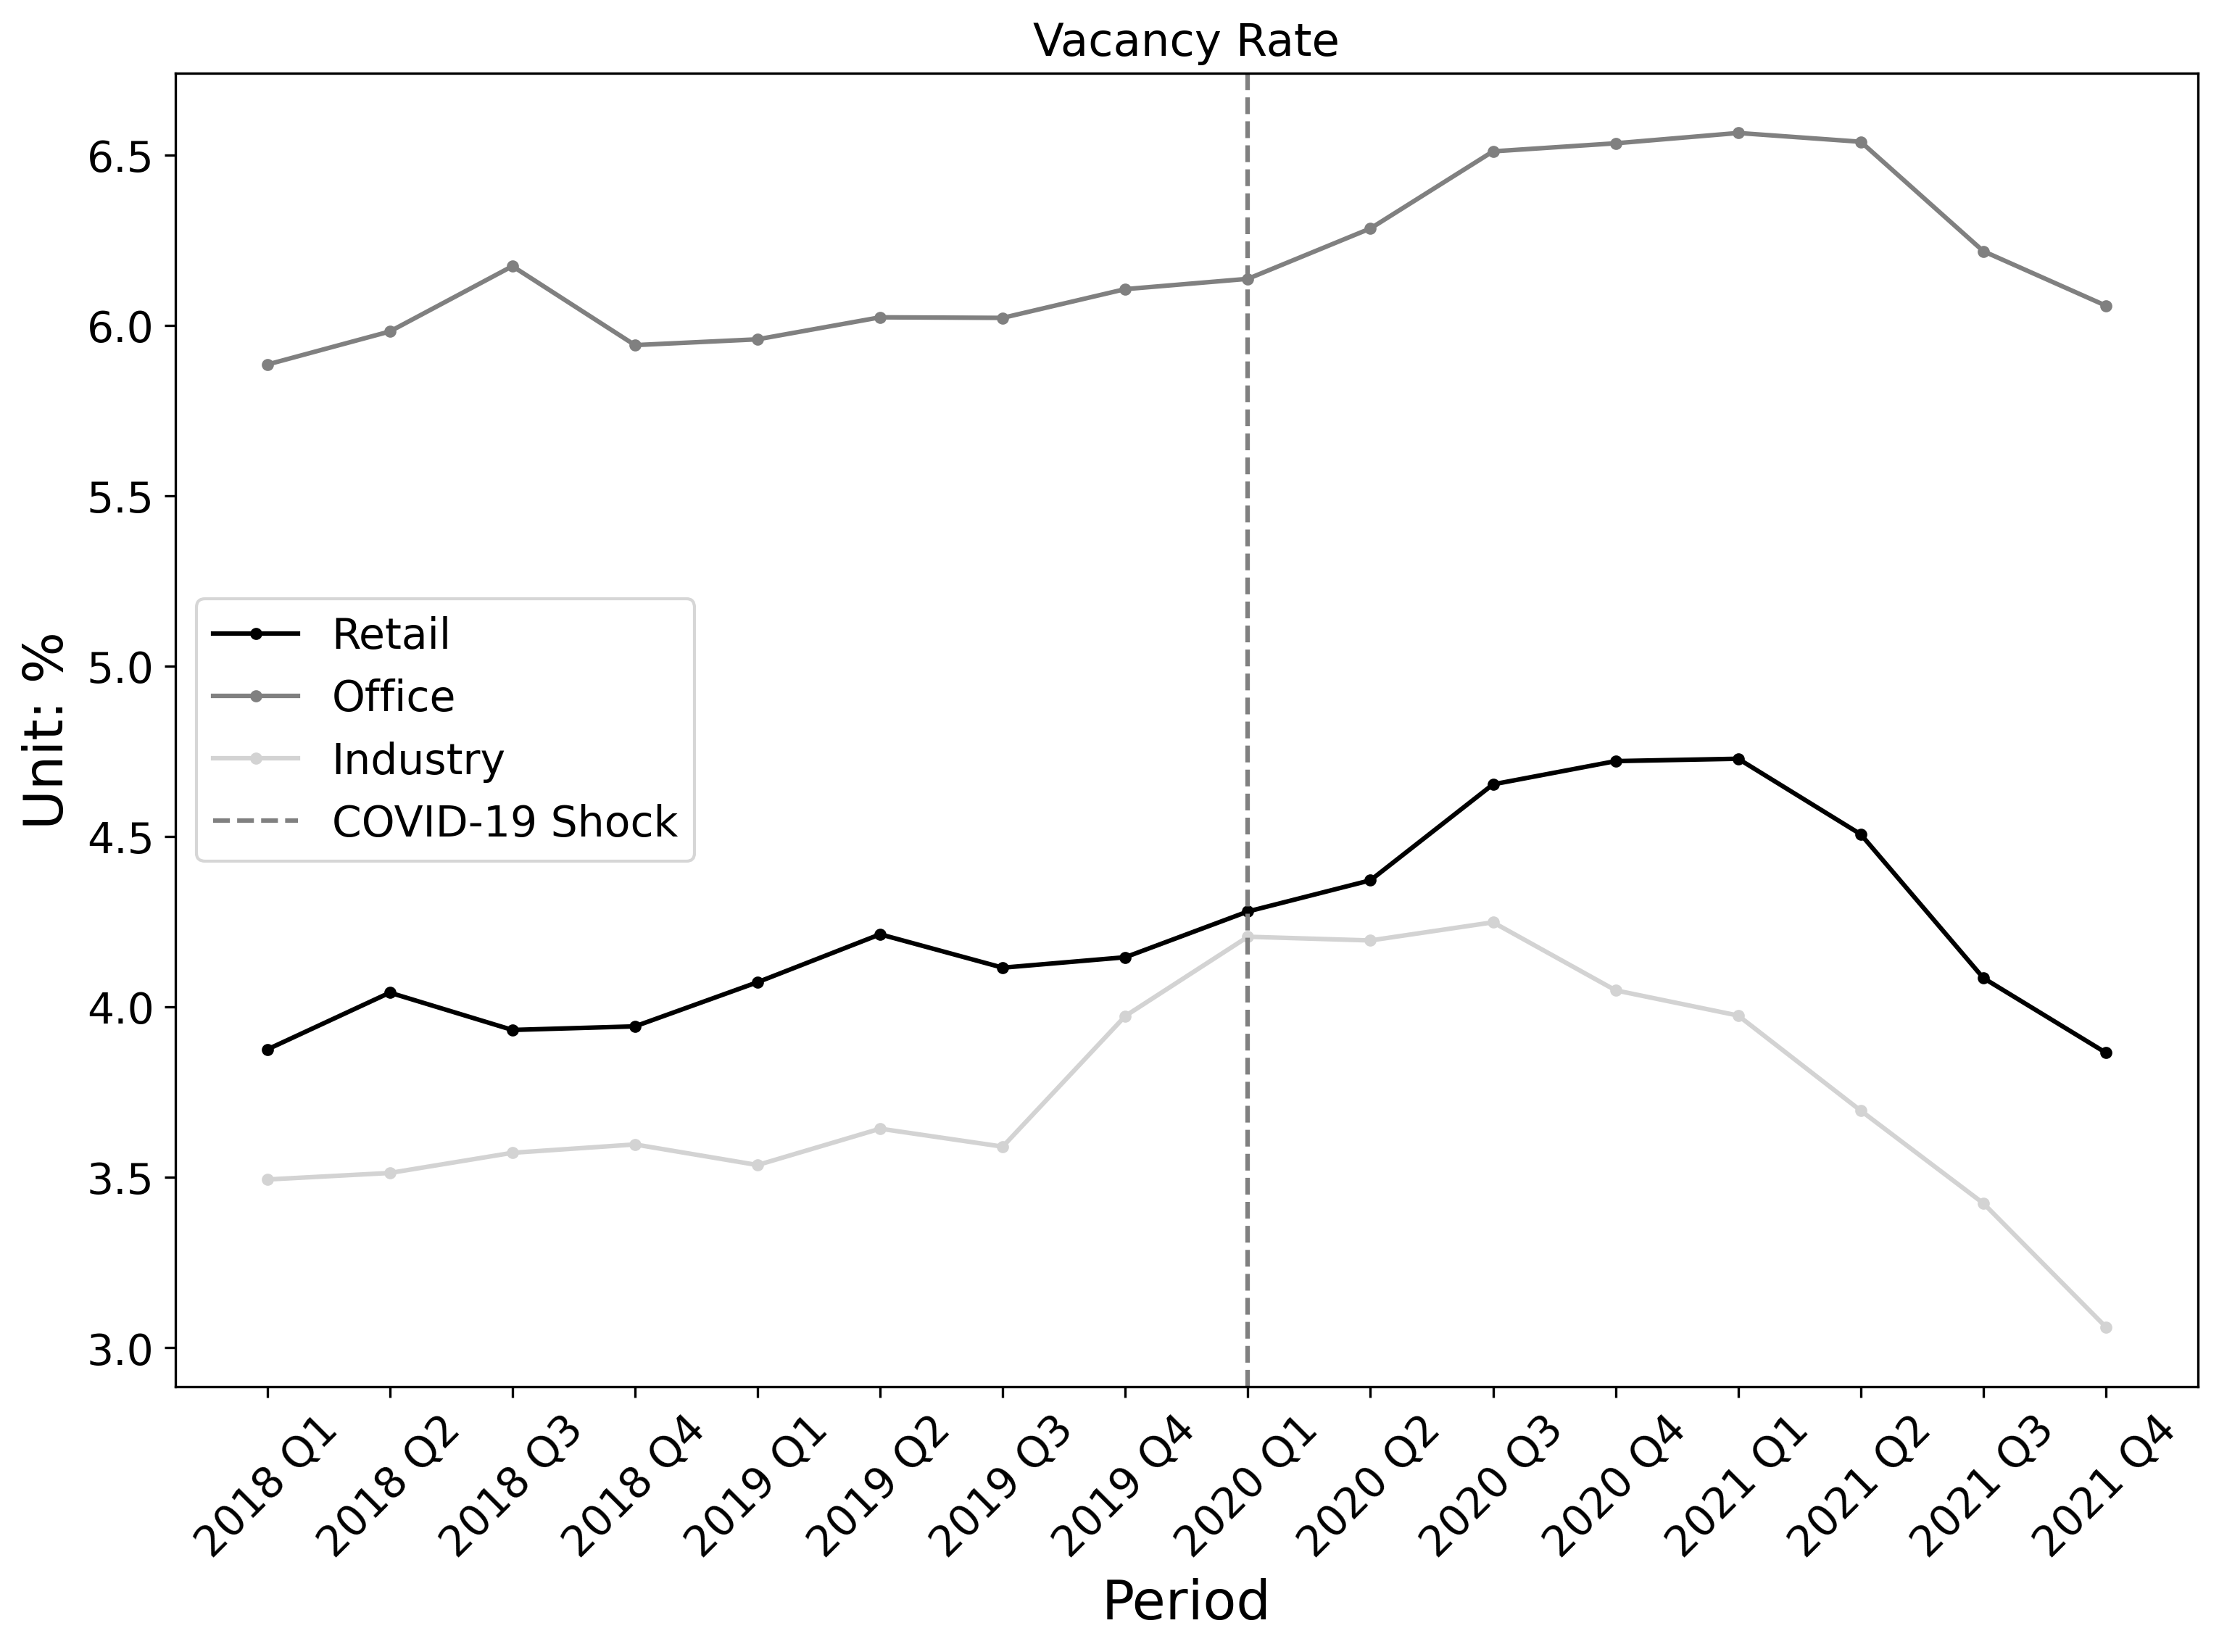

In [37]:
#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Rent Growth'
subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Vacancy Rate' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = subset_col.copy()
x = subset['Time'].to_list()
y1 = subset['Retail'].to_numpy()*100
y2 = subset['Office'].to_numpy()*100
y3 = subset['Industry'].to_numpy()*100
# plot lines
plt.plot(x, y1, label = "Retail", color='black',marker='.')
plt.plot(x, y2, label = "Office", color='gray',marker='.')
plt.plot(x, y3, label = "Industry", color='lightgray',marker='.')
plt.axvline(x='2020 Q1', color='gray', linestyle='--',  label = "COVID-19 Shock")




plt.xlabel('Period', fontsize=18)
plt.ylabel('Unit: %', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Vacancy Rate', fontsize=15)
#plt.show()
#plt.savefig('Vacancy Rate_20220502.png')
plt.savefig('Vacancy Rate_20220502.png',bbox_inches='tight',dpi=300)

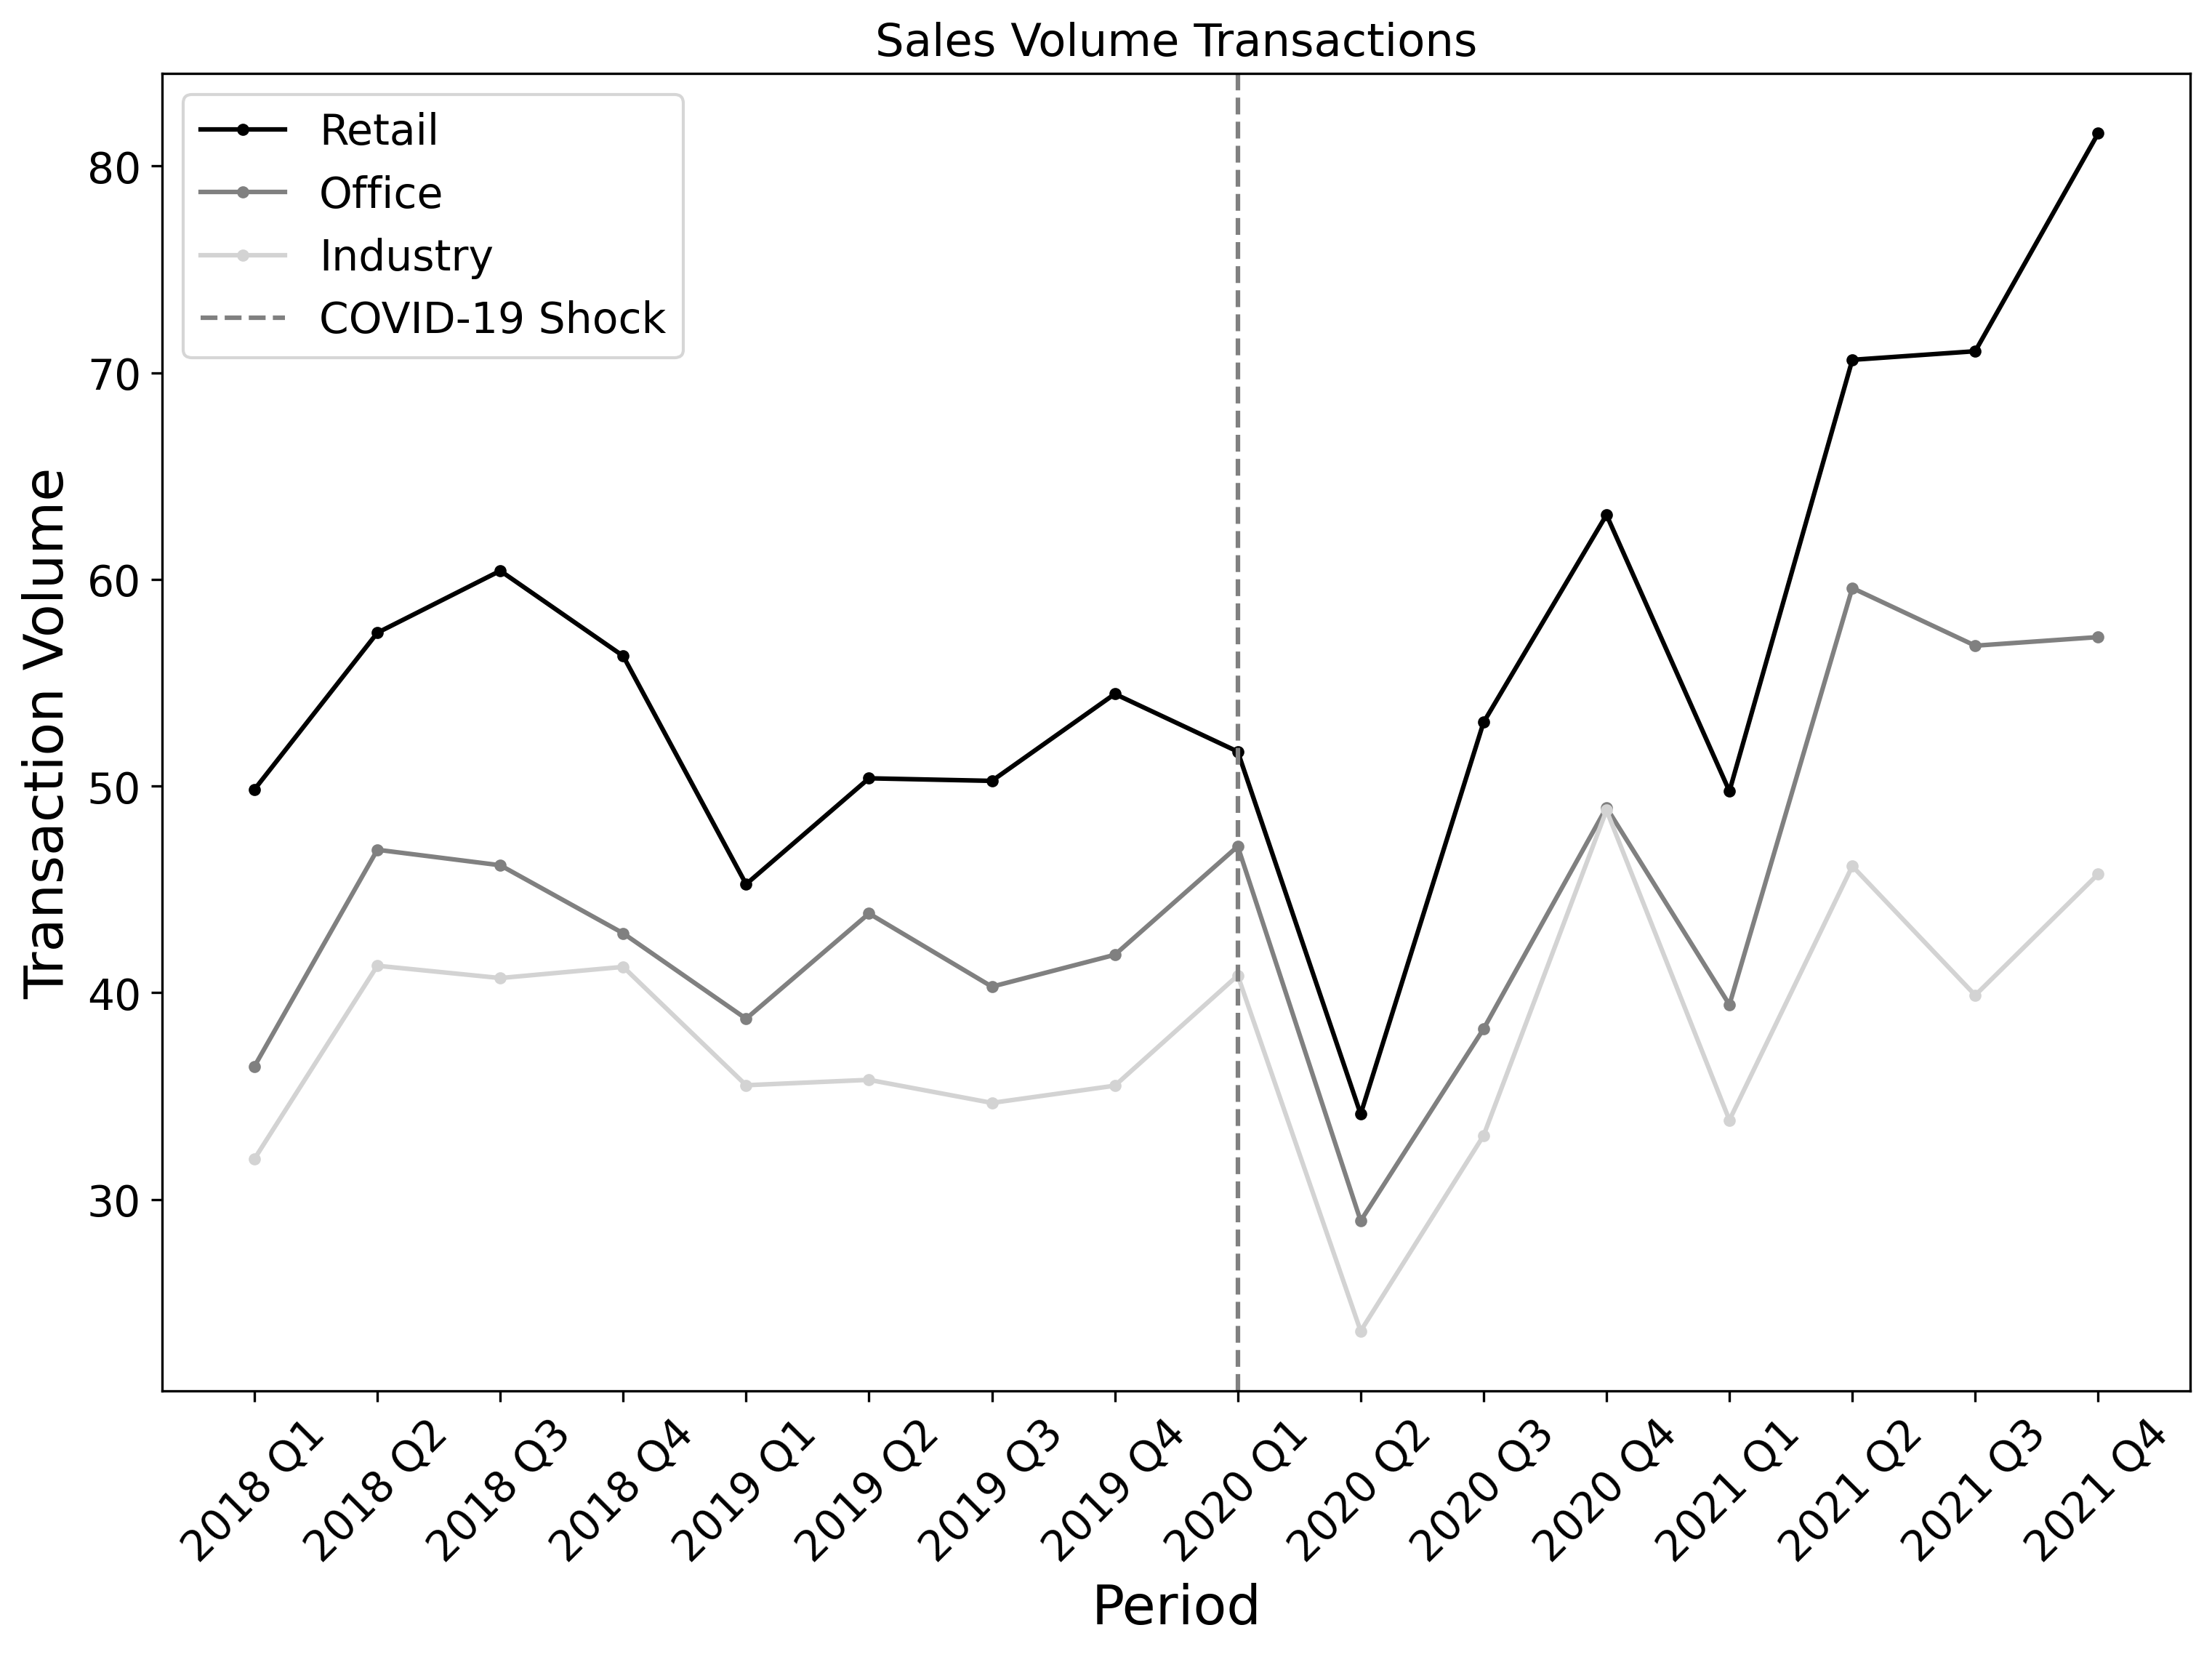

In [40]:
#use the data to draw line graph.
import matplotlib.pyplot as plt

#title = 'Market Rent Growth'
subset_col = data_pd_complete[data_pd_complete['Feature'] == 'Sales Volume Transactions' ]

fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')


subset = subset_col.copy()
x = subset['Time'].to_list()
y1 = subset['Retail'].to_numpy()
y2 = subset['Office'].to_numpy()
y3 = subset['Industry'].to_numpy()
# plot lines
plt.plot(x, y1, label = "Retail", color='black',marker='.')
plt.plot(x, y2, label = "Office", color='gray',marker='.')
plt.plot(x, y3, label = "Industry", color='lightgray',marker='.')
plt.axvline(x='2020 Q1', color='gray', linestyle='--',  label = "COVID-19 Shock")

plt.xlabel('Period', fontsize=18)
plt.ylabel('Transaction Volume', fontsize=18)
plt.legend(fontsize=14) # using a size in points
#plt.xticks(range(0,len(miami_picture['Period'].tolist()))[::4],miami_picture['Period'].tolist()[::4],fontsize=14, rotation=45)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Sales Volume Transactions', fontsize=15)
#plt.show()
#plt.savefig('Sales Volume Transactions_20220502.png')
plt.savefig('Sales Volume Transactions_20220502.png',bbox_inches='tight',dpi=300)